# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *8장 고급 인공 신경망 구현*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 8.1 심층 신경망이 부딪힌 한계 - 사라지는 기울기

### 8.2 심층 신경망 학습의 돌파구 - 연결강도 초기화

### 8.3 활성화 함수의 다양화

### 8.4 최적화 기법 - 경사하강법의 문제와 개선

### 8.5 다양한 최적화 기법 소개

### 8.6 텐서플로우 소개

### 8.7 텐서플로우로 시작하는 Hello world!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태:', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:',y_train.shape)

print('x_test 데이터의 형태:', x_test.shape)
print('x_test[0] 데이터의 형태:', x_test[0].shape)
print('y_test 데이터의 형태:',y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train 데이터의 형태: (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)
x_test 데이터의 형태: (10000, 28, 28)
x_test[0] 데이터의 형태: (28, 28)
y_test 데이터의 형태: (10000,)


In [2]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

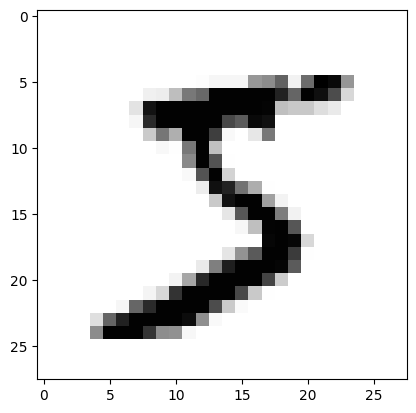

In [3]:
plt.imshow(num, cmap='Greys', interpolation='nearest')              # nearest 보간 적용

In [4]:
print('y_train[0] =', y_train[0])

y_train[0] = 5


### 8.8 keras로 순차 심층신경망 구축하기

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255               # 입력값 정규화 (0~255 정수로 이루어져 있기에 학습을 위해선 float형으로 변환해야함)

# sequential model로 진행
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),           # 입력을 이차원으로 받을 수 없기에 이차원배열을 일차원형태로 팽창시킴 (784개의 원소 + 1개의 편향값)
    keras.layers.Dense(256, activation = 'relu'),           # RELU 활성화함수를 통해 256개의 output 도출
    keras.layers.Dense(10, activation = 'softmax'),         # softmax 활성화함수를 통해 10개의 output 도출
])

# 학습을 위한 최적화 함수, 손실 함수등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])     # 여기서 등장하는 loss와 accuracy는 학습데이터에 대한 것이다
model.fit(x_train, y_train, epochs = 4)                                                           # mini batch size = 32가 default로 설정되어있음

Epoch 1/4
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2254 - accuracy: 0.9345
Epoch 2/4
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0927 - accuracy: 0.9718
Epoch 3/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0619 - accuracy: 0.9809
Epoch 4/4
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0446 - accuracy: 0.9862


In [6]:
y_hat = model.predict(x_test)
print(y_hat)

313/313 [==============================] - 1s 3ms/step
[[1.28304887e-08 7.40899893e-08 2.92867480e-06 ... 9.99971926e-01
  1.46165149e-07 5.15185593e-06]
 [1.47893731e-09 5.51042140e-05 9.99942362e-01 ... 1.28026073e-12
  1.05848574e-06 1.08913258e-12]
 [2.48783317e-06 9.98283029e-01 3.50696559e-04 ... 7.97859393e-04
  4.47576051e-04 4.08982623e-06]
 ...
 [3.44111501e-12 1.47187665e-10 1.16332236e-10 ... 2.07768895e-08
  2.98587793e-06 8.04301294e-07]
 [4.61774530e-09 2.24852897e-11 2.34733288e-10 ... 3.33103345e-09
  1.30845365e-05 7.92941893e-11]
 [4.23289848e-09 8.67463480e-12 6.60883828e-08 ... 1.86085583e-14
  1.45996770e-10 7.92903156e-12]]


In [7]:
yhat_idx = np.argmax( y_hat, axis = 1 )             # 각각의 배열 중에서 가장 큰 값을 가지는 요소들에 대한 배열을 생성
                                                    # (가장 큰 값을 가진다는 것은 정답일 가능성이 높다고 예측한 것이기 때문에)

yhat_idx

array([7, 2, 1, ..., 4, 5, 6])

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

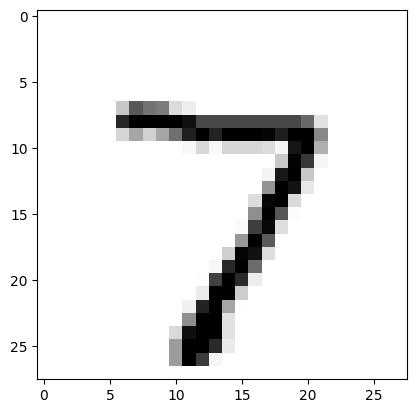

In [9]:
plt.imshow(x_test[0], cmap='Greys', interpolation='nearest')

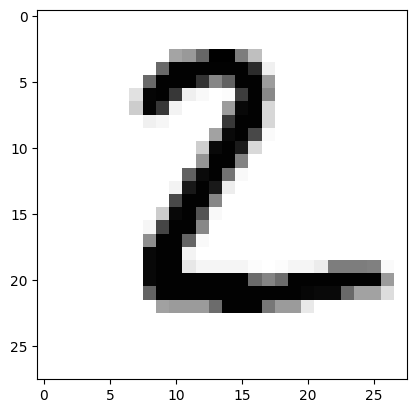

In [10]:
plt.imshow(x_test[1], cmap='Greys', interpolation='nearest')

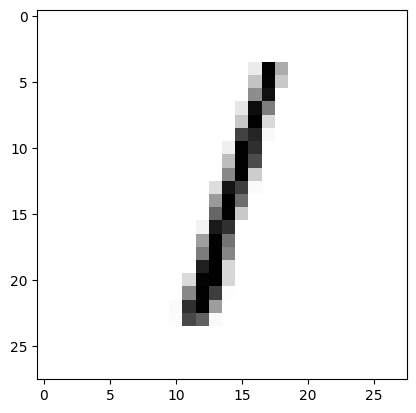

In [11]:
plt.imshow(x_test[2], cmap='Greys', interpolation='nearest')

### 8.9 인공신경망을 최적화 시키자

In [12]:
model.summary()                 # dense param # : (784 + 1(bias값)) * 256 = 200960,
                                # dense_1 param # : (256 + 1) * 10 = 2570

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9780
test 데이터의 손실값 0.07186319679021835 test 데이터의 정확도 0.9779999852180481


### 8.10 소프트맥스 함수와 원-핫 인코딩

In [14]:
import numpy as np

def softmax(a):
    exp_of_a = np.exp(a)       # 각각의 지수 함수
    sum_exp = np.sum(exp_of_a) # 지수 함수값의 합
    y = exp_of_a / sum_exp
    return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [15]:
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

소프트맥스 함수의 최댓값 : 0.7772704668966948


In [16]:
# 소프트맥스 함수의 입력값을 두 배로 증가시켜보자
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최댓값 :', np.max(softmax(a)))

신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최댓값 : 0.9505663642857384


### 8.11 원-핫 인코딩과 평균제곱 오차

In [17]:
from keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])  # 수치 데이터 0에서 4까지의 값
print('인코딩할 원본 데이터',data)

encoded = to_categorical(data)    # 원-핫 인코딩된 범주형 데이터 생성 (원-핫 인코딩 : 단 하나의 원소만 1이 포함되게끔 인코딩하는 것)
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [18]:
import numpy as np

# 정답 3이 인코딩된 target과 신경망의 예측값 y_hat이 있다고 가정하자
target = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


In [19]:
# 정답에서 많이 벗어난 other_y_hat 추정치
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])

# other_y_hat 추정치와 정답과의 오차를 알아보자 (정답이 아니기 때문에 정답보다 더 큰 오차가 발생하긴 하지만 그 수치가 미미하다)
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.25564


### 8.12 평균제곱 오차와 교차 엔트로피 오차

In [20]:
import numpy as np

def mse(y, t):   # 평균제곱오차
    return ((y-t)**2).mean()

# 교차 엔트로피 함수를 에러 함수로 사용해 보도록 하자 (mse보다 교차 엔트로피 함수의 수치가 에러에 대한 수치가 확연히 차이가 남 -> 가중치를 더 빠르게 찾을 수 있음 -> 학습 속도가 더 빨라짐)
def cee(y, t):
   delta = 1e-7
   return -np.sum(t * np.log(y + delta))

t = np.array([0, 0, 1])
y_hat1 = np.array([0.4, 0.05, 0.55])
y_hat2 = np.array([0.9, 0.09, 0.01])

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 cee : {:.2f}'.format(cee(y_hat1, t)))
print('y_hat2과의 cee : {:.2f}'.format(cee(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(cee(y_hat2, t)/cee(y_hat1, t)))
print()

# y_hat 추정치와 정답과의 오차를 알아보자
print('y_hat1과의 mse : {:.2f}'.format(mse(y_hat1, t)))
print('y_hat2과의 mse : {:.2f}'.format(mse(y_hat2, t)))
print('두 값의 비 : {:.2f}'.format(mse(y_hat2, t)/mse(y_hat1, t)))

y_hat1과의 cee : 0.60
y_hat2과의 cee : 4.61
두 값의 비 : 7.70

y_hat1과의 mse : 0.12
y_hat2과의 mse : 0.60
두 값의 비 : 4.93


### 8.13 정규화와 표준화, 배치 정규화

Text(0, 0.5, 'num of rooms')

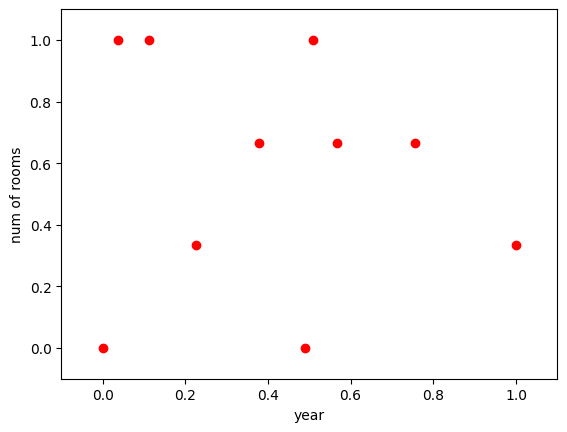

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

yr = np.array([15, 30, 23, 5, 9, 43, 33, 29, 3, 56])
n_rooms = np.array([2, 4, 3, 4, 4, 3, 3, 1, 1, 2])

# 정규화
min_max_scaler = MinMaxScaler()
yr_norm = min_max_scaler.fit_transform(yr[:, np.newaxis])
n_rooms_norm = min_max_scaler.fit_transform(n_rooms[:, np.newaxis])

plt.scatter(yr_norm, n_rooms_norm, c='red')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('year')
plt.ylabel('num of rooms')

### 8.14 확률적 경사 하강법과 배치 학습

### 8.15 더 깊은 층으로 정확도를 높여보자

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255           # 입력값 정규화

# 층을 추가한 모델 만들기
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),       # 이전 과정보다 은닉층을 더 분할시켰음 (node수가 더 줄었음에도 정확률이 더 증가하였음)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))          # 단순히 epoch 수를 늘리는 것만으로는 더 좋은 결과를 낼 수 없다

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2773 - accuracy: 0.9182 - val_loss: 0.1520 - val_accuracy: 0.9536
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9609 - val_loss: 0.1224 - val_accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0943 - accuracy: 0.9702 - val_loss: 0.1059 - val_accuracy: 0.9663
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9755 - val_loss: 0.1007 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9805 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.0889 - val_accuracy: 0.9751
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.1011 - val_accuracy:

In [23]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9725
test 데이터의 손실값 0.11254647374153137 test 데이터의 정확도 0.9725000262260437


In [24]:
history.history       # 세부적인 수치 변화를 확인할 수 있다

{'loss': [0.2772876024246216,
  0.1253637969493866,
  0.09425470232963562,
  0.07762005180120468,
  0.061301227658987045,
  0.0536976084113121,
  0.04502639174461365,
  0.04115026071667671,
  0.03480837121605873,
  0.030859386548399925],
 'accuracy': [0.918150007724762,
  0.9609000086784363,
  0.9701833128929138,
  0.9754999876022339,
  0.9804999828338623,
  0.9829166531562805,
  0.985883355140686,
  0.9867500066757202,
  0.9884166717529297,
  0.9897500276565552],
 'val_loss': [0.1520054042339325,
  0.12236914038658142,
  0.1059291735291481,
  0.1007133349776268,
  0.09671704471111298,
  0.08892212808132172,
  0.10107243061065674,
  0.10466831922531128,
  0.10334209352731705,
  0.11254647374153137],
 'val_accuracy': [0.9535999894142151,
  0.9617000222206116,
  0.9663000106811523,
  0.9699000120162964,
  0.9721999764442444,
  0.9750999808311462,
  0.9733999967575073,
  0.972599983215332,
  0.9740999937057495,
  0.9725000262260437]}

<Axes: >

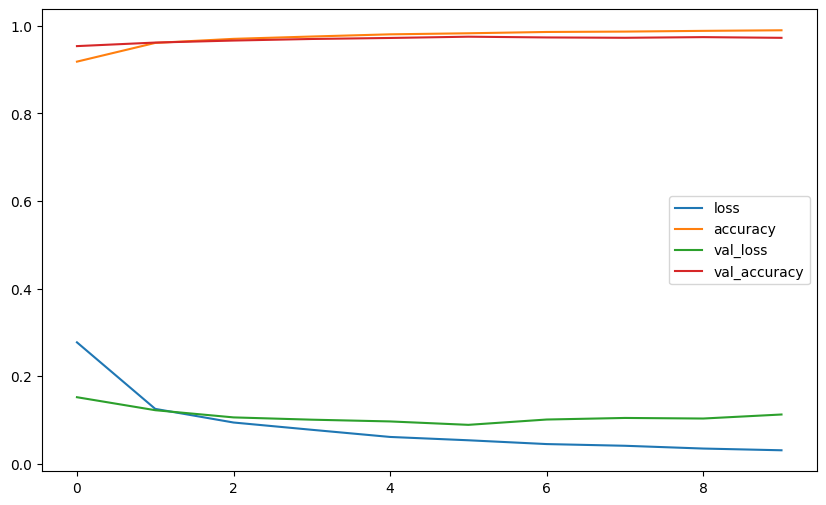

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (10, 6))

In [26]:
# 더 많은 층을 가진 신경망 모델 만들기 (은닉층을 추가하는 것만으로 정확률을 올리는 것에는 한계가 있음)
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2963 - accuracy: 0.9097 - val_loss: 0.1771 - val_accuracy: 0.9457
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1418 - accuracy: 0.9579 - val_loss: 0.1691 - val_accuracy: 0.9494
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1108 - accuracy: 0.9669 - val_loss: 0.1373 - val_accuracy: 0.9634
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9722 - val_loss: 0.1092 - val_accuracy: 0.9689
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0789 - accuracy: 0.9762 - val_loss: 0.1055 - val_accuracy: 0.9696
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0688 - accuracy: 0.9793 - val_loss: 0.1068 - val_accuracy: 0.9684
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9816 - val_loss: 0.1236 - val_accuracy:

In [27]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과 :
313/313 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9751
test 데이터의 손실값 0.09534426033496857 test 데이터의 정확도 0.9750999808311462


<Axes: >

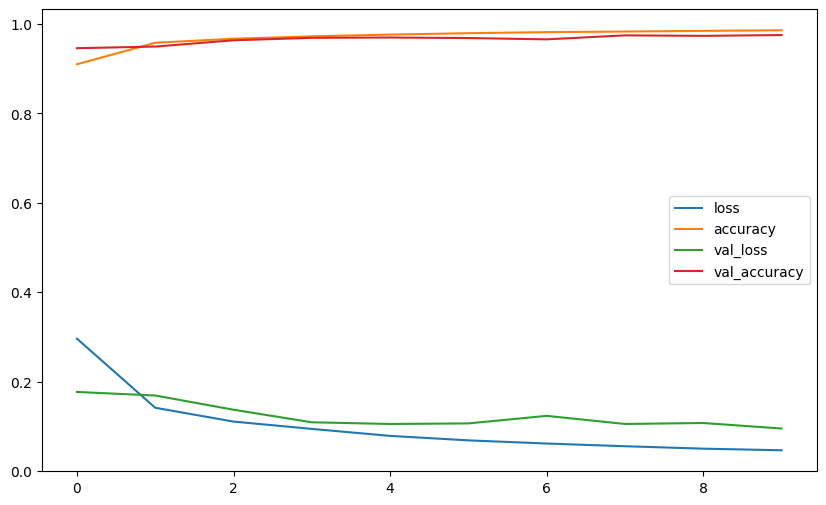

In [28]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 6))

### 8.16 학습데이터에만 최적화된 신경망 개선하기 : 드롭아웃

In [29]:
data = np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [30]:
layer = tf.keras.layers.Dropout(.3, input_shape = (2, ))
outputs = layer(data, training=True)

print(outputs)

tf.Tensor(
[[ 1.4285715  2.857143   4.285714   0.         7.1428576]
 [ 8.571428  10.        11.428572  12.857143  14.285715 ]], shape=(2, 5), dtype=float32)


In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255  # 입력값 정규화

# 드롭아웃 계층을 가진 신경망 모델 만들기 (은닉층을 추가하는 것만으로 정확률을 올리는 것에는 한계가 존재하기 때문에 드롭아웃 기법 적용)
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
'''
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax'),
])
# 이전 모델과 동일한 하이퍼파라미터로 컴파일하고 피팅함
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10)
'''

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7275 - accuracy: 0.7671 - val_loss: 0.2267 - val_accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3586 - accuracy: 0.9063 - val_loss: 0.1766 - val_accuracy: 0.9526
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3071 - accuracy: 0.9214 - val_loss: 0.1740 - val_accuracy: 0.9522
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2759 - accuracy: 0.9303 - val_loss: 0.1461 - val_accuracy: 0.9597
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2504 - accuracy: 0.9358 - val_loss: 0.1401 - val_accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2353 - accuracy: 0.9377 - val_loss: 0.1323 - val_accuracy: 0.9656
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2259 - accuracy: 0.9406 - val_loss: 0.1271 - val_accura

"\nmodel = keras.models.Sequential( [\n    keras.layers.Flatten(input_shape = (28, 28)),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(256, activation= 'relu'),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(10, activation= 'softmax'),\n])\n# 이전 모델과 동일한 하이퍼파라미터로 컴파일하고 피팅함\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\nmodel.fit(x_train, y_train, epochs = 10)\n"

드롭아웃 노드를 가진 다층 신경망 모델의 학습 결과 :
313/313 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9682
[0.12311486899852753, 0.9682000279426575]


<Axes: >

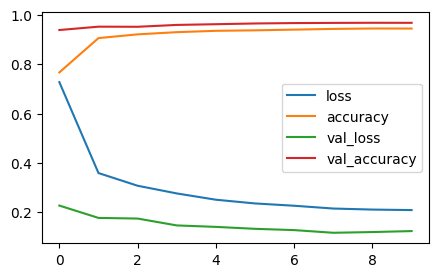

In [32]:
# overfitting 문제가 해결된 것을 확인할 수 있음 -> 이 경우 epoch를 더 올리면 더 나은 결과를 얻을 수도 있음

print('드롭아웃 노드를 가진 다층 신경망 모델의 학습 결과 :')
print(model.evaluate(x_test, y_test))

import pandas as pd
pd.DataFrame(history.history).plot(figsize = (5, 3))

### LAB 8-1: Fashion-MNIST 데이터 분류하기

In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [35]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


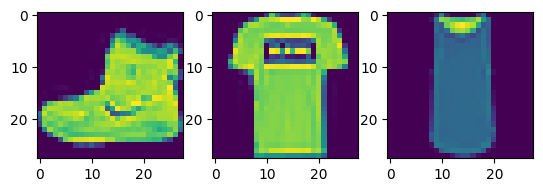

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [37]:
print(train_labels[:3])

[9 0 0]


In [38]:
# 0-255 구간의 픽셀을 정규화한다
train_images, test_images = train_images / 255, test_images / 255

# 순차 심층 신경망 모델을 만들자
model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(32, activation= 'relu'),
   keras.layers.Dense(10, activation= 'softmax'),
])

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.25)

Epoch 1/10
704/704 [==============================] - 8s 10ms/step - loss: 0.6070 - accuracy: 0.7880 - val_loss: 0.4422 - val_accuracy: 0.8435
Epoch 2/10
704/704 [==============================] - 5s 8ms/step - loss: 0.4478 - accuracy: 0.8394 - val_loss: 0.4132 - val_accuracy: 0.8499
Epoch 3/10
704/704 [==============================] - 6s 9ms/step - loss: 0.4014 - accuracy: 0.8534 - val_loss: 0.3930 - val_accuracy: 0.8565
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 0.3769 - accuracy: 0.8620 - val_loss: 0.3605 - val_accuracy: 0.8674
Epoch 5/10
704/704 [==============================] - 7s 9ms/step - loss: 0.3617 - accuracy: 0.8669 - val_loss: 0.3596 - val_accuracy: 0.8672
Epoch 6/10
704/704 [==============================] - 6s 8ms/step - loss: 0.3452 - accuracy: 0.8718 - val_loss: 0.3365 - val_accuracy: 0.8777
Epoch 7/10
704/704 [==============================] - 9s 13ms/step - loss: 0.3340 - accuracy: 0.8751 - val_loss: 0.3485 - val_accuracy: 0.8724
Epoc

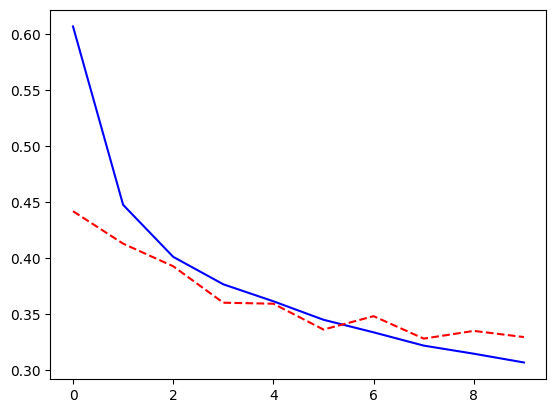

In [40]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

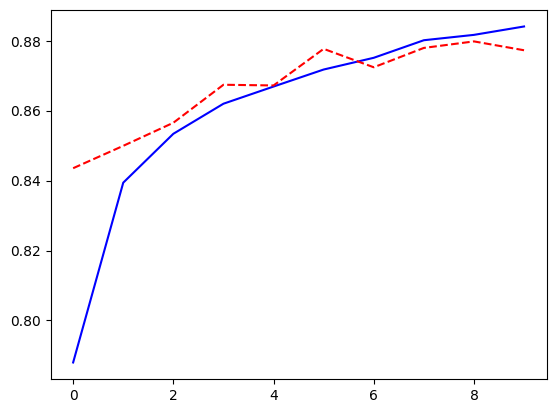

In [41]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)          # verbose : 0 set -> silent, 1 set -> progress bar, 2 set -> one line per epoch.

print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3440 - accuracy: 0.8750 - 677ms/epoch - 2ms/step
테스트 정확도: 0.875


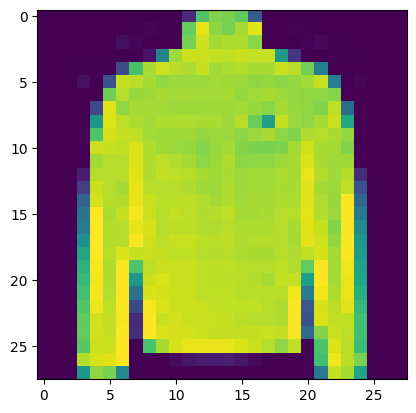

In [43]:
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [44]:
print(test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]      # 해당 모델이 데이터의 배열을 입력을 받기 때문에 새로운 축을 만들어 이미지가 하나 있는 배열임을 명시
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))                                    # 소수점 아래 세 자리 정확도로 살펴보자

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 88ms/step
[[0.    0.    0.009 0.    0.986 0.    0.005 0.    0.    0.   ]]


In [45]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )          # 결과가 가장 큰 값이 모델이 추론한 예측값임

yhat

1/1 [==============================] - 0s 41ms/step


4

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
print(class_names[yhat])

Coat


In [48]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize = (images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
      for j in range(images_per_row):
          if i*images_per_row + j >= n_images: break
          img_idx = i*images_per_row + j
          a_image = images[img_idx].reshape(28,28)
          if n_rows>1: axis = ax[i, j]
          else: axis = ax[j]
          axis.get_xaxis().set_visible(False)
          axis.get_yaxis().set_visible(False)
          label = class_names[labels[img_idx]]
          axis.set_title(label)
          axis.imshow(a_image, interpolation='nearest')

1/1 [==============================] - 0s 27ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0 2 5 7 5 1]


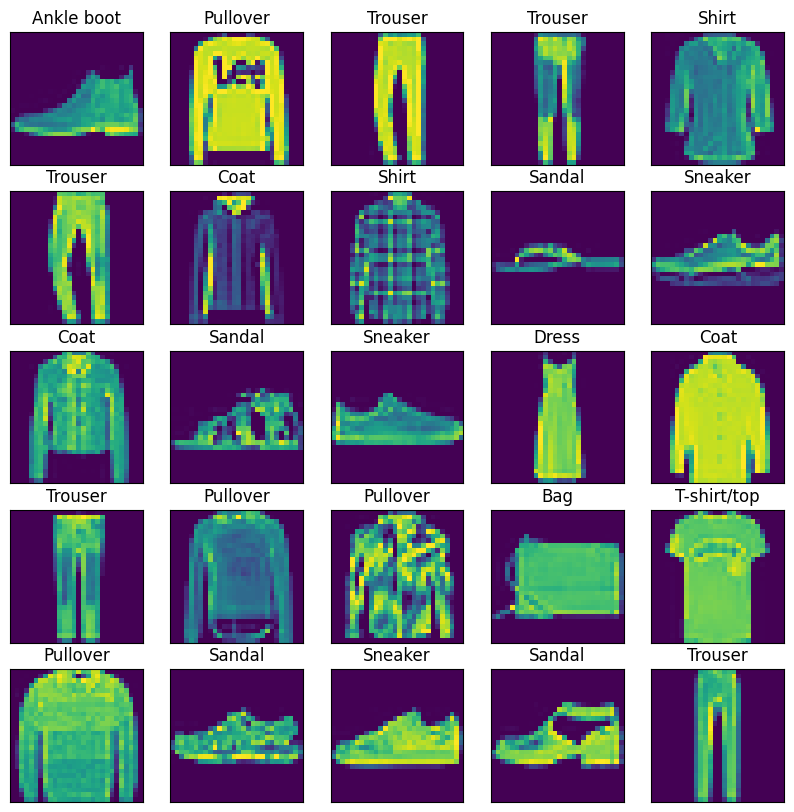

In [49]:
images = test_images[:25]
predictions = np.argmax(model.predict(images), axis=1)

print(predictions)
plot_images(images, predictions, images_per_row = 5)